In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/HARSHIT/Desktop/ML/DataSETS/ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


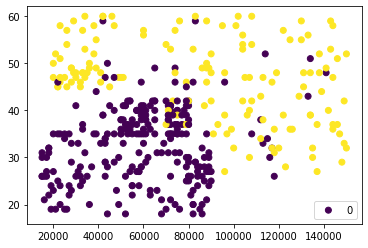

In [3]:
plt.scatter(data['EstimatedSalary'],data['Age'],c =data["Purchased"])
plt.legend(data['Purchased'])

In [4]:
x= data.iloc[:,0:2].values
y = data.iloc[:,-1].values

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [6]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
x_tr = scaler.fit_transform(x_tr)
x_tr

array([[-0.90611644,  0.42070198],
       [-1.19723819,  0.27566359],
       [ 0.74357347, -1.37777407],
       [ 0.84061405, -1.34876639],
       [-0.0327512 ,  1.95810893],
       [-0.32387295,  1.31994001],
       [-1.48835994, -1.49380478],
       [-1.39131936, -0.18845926],
       [-0.80907586, -0.76861283],
       [-1.19723819, -1.37777407],
       [ 0.93765463, -1.34876639],
       [ 0.06428939,  1.26192465],
       [ 1.42285755,  0.59474805],
       [-0.22683236, -1.34876639],
       [-0.61499469, -1.58082782],
       [-0.0327512 ,  0.24665591],
       [ 0.06428939,  0.30467127],
       [-1.39131936, -1.203728  ],
       [-0.22683236, -0.42052069],
       [ 0.06428939, -0.1304439 ],
       [ 1.7139793 ,  1.61001679],
       [ 0.93765463, -0.5365514 ],
       [ 1.03469522, -1.05868961],
       [-1.10019761, -1.14571264],
       [ 1.51989813, -1.02968193],
       [ 1.1317358 , -0.88464354],
       [ 1.42285755,  2.33520875],
       [-1.29427878, -1.4647971 ],
       [-0.22683236,

In [10]:
x_te = scaler.transform(x_te)

# 1st method

In [11]:
np.sqrt(x_tr.shape[0])

17.88854381999832

In [12]:
k = 17

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [14]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=17)

In [15]:
pred = knn.predict(x_te)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_te,pred)

0.925

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_te,pred)

array([[44,  2],
       [ 4, 30]], dtype=int64)

# 2nd method

In [19]:
accuracy = []

for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    accuracy.append(accuracy_score(y_te,knn.predict(x_te)))

In [20]:
accuracy

[0.8625,
 0.7875,
 0.9125,
 0.8875,
 0.925,
 0.9125,
 0.9375,
 0.925,
 0.925,
 0.9125,
 0.925,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.95,
 0.9375,
 0.95]

In [21]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=9)

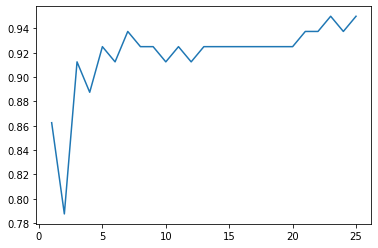

In [22]:
plt.plot(range(1,26),accuracy)

In [23]:
def predict():
    age = int(input('Enter the age'))
    salary = int(input('Enter the salary'))

    xx = np.array([[age],[salary]]).reshape(1,2)
    ans = knn.predict(xx)[0]
    return ans
    

In [24]:
predict()

1